# SQLAlchemy - Surfs Up!
*Created by Dale Currigan, May 2021*
  
**Instructions:**  
  
Select *Restart & Run All* from the Kernel menu  
Then scroll down or use the navigation links below:  

[Reflect Tables into SQLAlchemy ORM](#reflect)    
[Exploratory Climate Analysis](#ECA) 
[Precipitation Analysis](#precipitation)  
[Station Analysis](#station)  
[Humidity vs Latitude Analysis](#humidity)  
[Bonus Challenge Assignments](#bonus)  
[Temperature Analysis 1](#temp1)  
[Temperature Analysis 2](#temp2)  
[Daily Rainfall Average](#rainfall_avg) 


In [1]:
# Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

<a id='reflection'></a>
### Reflect Tables into SQLAlchemy ORM

In [2]:
# Import of Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, extract

In [3]:
# Create engine to connect to sqlite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# Reflect the tables into classes 
Base = automap_base()
Base.prepare(engine, reflect=True)

# Show all available classes 
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create session (link) from Python to the database
from sqlalchemy.orm import Session
session = Session(bind=engine)
connection = engine.connect()

<a id='ECA'></a>
## Exploratory Climate Analysis

<a id='precipitation'></a>
### Precipitation Analysis

In [7]:
# Use inspector to display the column names and data types 
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Find the last date in the data (In order to find the most recent date to work back from 12 months)
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

In [9]:
# Perform a query to retrieve the date and precipitation scores
prec_data = session.query(Measurement.date, Measurement.prcp).\
     filter(Measurement.date >= '2016-08-23').all()

prec_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [10]:
# Save the query results as a Pandas DataFrame
rainfall = pd.DataFrame(prec_data)

# Drop Nan values
rainfall = rainfall.dropna() 

# Make sure the order is sorted by date
rainfall = rainfall.sort_values(by=['date'])


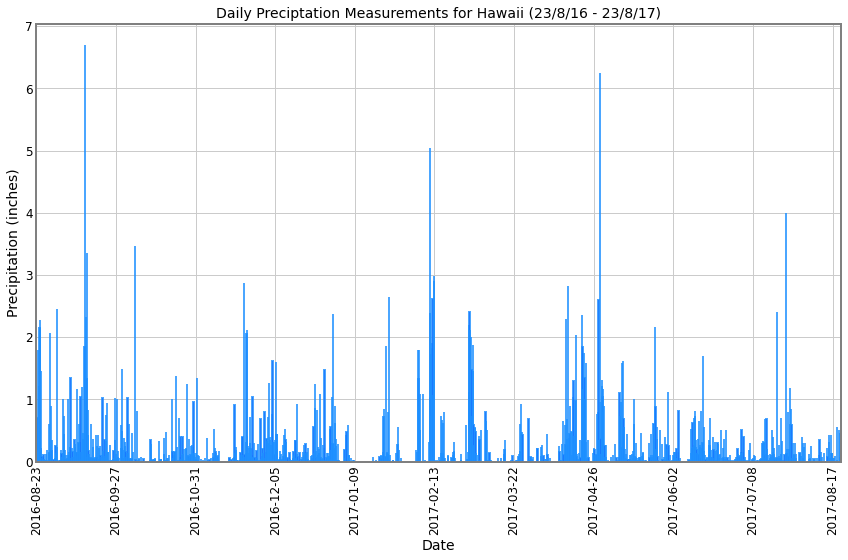

In [34]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(facecolor='white')
ax = rainfall.plot.bar(x='date', y='prcp', color='b', alpha=0.8, figsize=(12,8), 
                       edgecolor='dodgerblue', linewidth=2, grid=True, legend=False, ax=ax)
                     

# Formatting and Display
    # formatting borders and background colours
ax.spines['bottom'].set_visible(True), ax.spines['bottom'].set_color('0.5'), ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_visible(True), ax.spines['top'].set_color('0.5'), ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_visible(True), ax.spines['left'].set_color('0.5'), ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_visible(True), ax.spines['right'].set_color('0.5'), ax.spines['right'].set_linewidth(2)
ax.set_facecolor('white')
    # format titles and axis labels
plt.title("Daily Preciptation Measurements for Hawaii (23/8/16 - 23/8/17)", fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation (inches)', fontsize=14)
    # set x & y-tick spacing and formatting 
x_tick_labels = rainfall['date'].to_list()
x_ticks = np.arange(0,len(rainfall),200)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels[::200], rotation='vertical', size=12)
plt.yticks(fontsize=12)
plt.xlim(0,len(rainfall))

plt.tight_layout()
plt.savefig("Output/precipitation.png")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = pd.DataFrame()
summary['Mean'] = rainfall.mean()
summary['Median'] = rainfall.median()
summary['Min'] = rainfall.min()
summary['Max'] = rainfall.max()
summary['Var'] = rainfall.var()
summary['Std'] = rainfall.std()
summary['25%'] = rainfall.describe(include='all').loc['25%']
summary['75%'] = rainfall.describe(include='all').loc['75%']
summary['IQR'] = rainfall.describe(include='all').loc['75%'] - rainfall.describe(include='all').loc['25%']

summary.rename(index={'prcp':'Precipitation (inches)'}, inplace=True)
summary

,Mean,Median,Min,Max,Var,Std,25%,75%,IQR
Precipitation (inches),0.177279,0.02,0,6.7,0.212696,0.46119,0,0.13,0.13


<a id='station'></a>
### Station Analysis

In [13]:
# Use inspector to view display the column names and data types 
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Design a query to calculate the total number of stations
result = session.query(Station.id).distinct(Station.id).count()
print(f"There are {result} unique stations in total")

There are 9 unique stations in total


In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?

# First create a query that joins the two tables on 'station' and convert data to a pandas df
sel = [Station.id, Station.station, Station.name, Measurement.station, Measurement.date, Measurement.tobs]
result = session.query(*sel).filter(Station.station == Measurement.station).all()
station_df = pd.DataFrame(result)
station_df = station_df.dropna() 
station_df.head()

,id,station,name,station,date,tobs
0,1,USC00519397,"WAIKIKI 717.2, HI US",USC00519397,2010-01-01,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",USC00519397,2010-01-02,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",USC00519397,2010-01-03,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",USC00519397,2010-01-04,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",USC00519397,2010-01-06,73.0


In [16]:
# Group by station name to find the most active stations 
active_stations = station_df.groupby(['name', 'id'])['date'].count()

print("The stations in descending order of activty are:")
active_stations = pd.DataFrame(active_stations.sort_values(ascending=False)).reset_index()
active_stations.rename(columns={"date":"count"})

The stations in descending order of activty are:


,name,id,count
0,"WAIHEE 837.5, HI US",7,2772
1,"WAIKIKI 717.2, HI US",1,2724
2,"KANEOHE 838.1, HI US",2,2709
3,"WAIMANALO EXPERIMENTAL FARM, HI US",6,2669
4,"MANOA LYON ARBO 785.2, HI US",9,2612
5,"KUALOA RANCH HEADQUARTERS 886.9, HI US",3,2202
6,"HONOLULU OBSERVATORY 702.2, HI US",8,1979
7,"PEARL CITY, HI US",4,1372
8,"UPPER WAHIAWA 874.3, HI US",5,511


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# First create a query that joins the two tables on 'station' and selects just station id 7
# Use the func.min, func.max, func.avg to get results
sel = [Station.id, Station.station, Station.name, Measurement.station, func.min(Measurement.tobs),
       func.max(Measurement.tobs), func.avg(Measurement.tobs)]
result = session.query(*sel).filter(Station.station == Measurement.station).filter(Station.id == 7).all()

# Display Results
print(f"Temperature data for station: {result[0][2]}")
top_station = pd.DataFrame(index={"Lowest Temp", "Highest Temp", "Average Temp"}, columns={"Temp (F)"})
top_station.iloc[0,0] = round(result[0][4],2)
top_station.iloc[1,0] = round(result[0][5],2)
top_station.iloc[2,0] = round(result[0][6],2)
top_station

Temperature data for station: WAIHEE 837.5, HI US


,Temp (F)
Highest Temp,54
Lowest Temp,85
Average Temp,71.66


In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# First create a query that joins the two tables on 'station', selects just station id 7, and just the last 12 months
sel = [Station.station, Station.name, Measurement.station, Measurement.date, Measurement.tobs]
result = session.query(*sel).filter(Station.station == Measurement.station).filter(Station.id == 7).\
                    filter(Measurement.date >= '2016-08-23').all()

year_temp_data = pd.DataFrame(result)
year_temp_data.head()
     

,station,name,station,date,tobs
0,USC00519281,"WAIHEE 837.5, HI US",USC00519281,2016-08-23,77.0
1,USC00519281,"WAIHEE 837.5, HI US",USC00519281,2016-08-24,77.0
2,USC00519281,"WAIHEE 837.5, HI US",USC00519281,2016-08-25,80.0
3,USC00519281,"WAIHEE 837.5, HI US",USC00519281,2016-08-26,80.0
4,USC00519281,"WAIHEE 837.5, HI US",USC00519281,2016-08-27,75.0


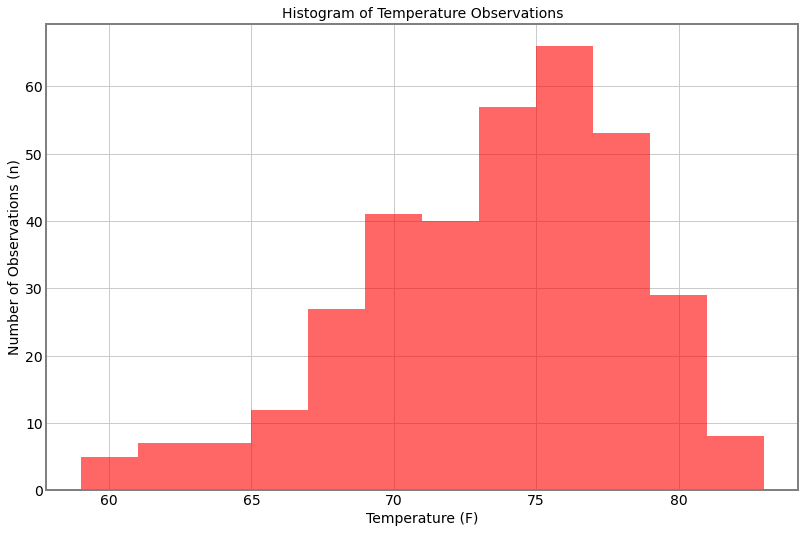

In [36]:
# Plot the historgram of temperature observations
fig, ax = plt.subplots(facecolor='white', figsize=(12,8))
fig = year_temp_data.hist(alpha=0.6, ax=ax, color='red', bins=12)

# Formatting and display
ax.spines['bottom'].set_visible(True), ax.spines['bottom'].set_color('0.5'), ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_visible(True), ax.spines['top'].set_color('0.5'), ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_visible(True), ax.spines['left'].set_color('0.5'), ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_visible(True), ax.spines['right'].set_color('0.5'), ax.spines['right'].set_linewidth(2)
ax.set_facecolor('white')

plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Number of Observations (n)', fontsize=14)
plt.title('Histogram of Temperature Observations', fontsize=14)
plt.savefig("Output/temp_histogram.png")
plt.show()

<a id='bonus'></a>
## Bonus Challenge Assignments

<a id='temp1'></a>
### Temperature Analysis 1

In [20]:
#Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between 
#the temperature in, for example, June and December?
# You may either use SQLAlchemy or pandas's read_csv() to perform this portion.


# Identify the average temperature in June at all stations across all available years in the dataset. 
june_avg = session.query(func.avg(Measurement.tobs)).filter(extract('month', Measurement.date) == 6).all()
print(f"The avaerage Temperature in June across all years in the data set was {round(june_avg[0][0],2)} degrees F")
print("")

# Do the same for December temperature.
dec_avg = session.query(func.avg(Measurement.tobs)).filter(extract('month', Measurement.date) == 12).all()
print(f"The avaerage Temperature in December across all years in the data set was {round(dec_avg[0][0],2)} degrees F")
print("")



The avaerage Temperature in June across all years in the data set was 74.94 degrees F

The avaerage Temperature in December across all years in the data set was 71.04 degrees F



In [21]:
# Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
# Will you use a paired t-test, or an unpaired t-test? Why?

# Retrieve the data for June and Dec groups
june_data = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
dec_data = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
stat, p_val = stats.ttest_ind(june_data,dec_data)

print(f"Independent sample T-test revealed a P-value of {p_val[0]}, suggesting temeperatures")
print("between June and Decemebr have a statistitically significant differrence.")
print("")      
print("An unpaired test was used, as whilst the groups contain measurements of the same thing") 
print("(Hawaii temperatures), there are different numbers of measurements present in each")
print("group, so the measurements are not truly 'paired' and are rather independent sets")

Independent sample T-test revealed a P-value of 3.9025129038616655e-191, suggesting temeperatures
between June and Decemebr have a statistitically significant differrence.

An unpaired test was used, as whilst the groups contain measurements of the same thing
(Hawaii temperatures), there are different numbers of measurements present in each
group, so the measurements are not truly 'paired' and are rather independent sets


<a id='temp2'></a>
### Temperature Analysis 2

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

####################################################################################
# Planned Trip = 11/04/18 - 25/04/18, so will use the 2017 data 11/04/17 - 25/04/17
####################################################################################

result = calc_temps('2017-04-11', '2017-04-25')
trip_temps = pd.DataFrame(index={"Lowest Temp", "Highest Temp", "Average Temp"}, columns={"Temp (F)"})
trip_temps.iloc[0,0] = round(result[0][0],2)
trip_temps.iloc[1,0] = round(result[0][2],2)
trip_temps.iloc[2,0] = round(result[0][1],2)
print("The data for this time period in 2017 was:")
trip_temps


The data for this time period in 2017 was:


,Temp (F)
Highest Temp,67
Lowest Temp,83
Average Temp,73.8


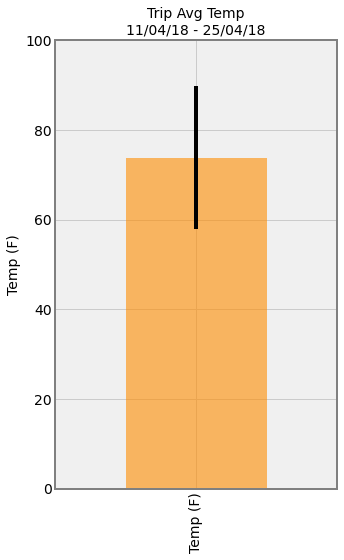

In [40]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

error = trip_temps.loc['Highest Temp','Temp (F)'] - trip_temps.loc['Lowest Temp','Temp (F)']
fig, ax = plt.subplots(facecolor='white', figsize=(5,8))
fig = trip_temps.loc['Average Temp',:].plot(kind='bar', color='darkorange', yerr=error, alpha=0.6)

# Formatting and display
ax.spines['bottom'].set_visible(True), ax.spines['bottom'].set_color('0.5'), ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_visible(True), ax.spines['top'].set_color('0.5'), ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_visible(True), ax.spines['left'].set_color('0.5'), ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_visible(True), ax.spines['right'].set_color('0.5'), ax.spines['right'].set_linewidth(2)
plt.ylim(0,100)
plt.xlabel('')
plt.ylabel('Temp (F)', fontsize=14)
plt.title('Trip Avg Temp\n11/04/18 - 25/04/18', fontsize=14)

plt.tight_layout()
plt.savefig("Output/trip_temps.png")
plt.show()

In [25]:
# A second function created that can return the same data points (min, max, avg) for each day of in the input range
def calc_temps_daily(start_date, end_date):
    
    return session.query(Measurement.date, func.round(func.min(Measurement.tobs),2), 
                         func.round(func.avg(Measurement.tobs),2), func.round(func.max(Measurement.tobs),2)).\
                         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
                         group_by(Measurement.date).all()



In [26]:
####################################################################################
# Planned Trip = 11/04/18 - 25/04/18, so will use the 2017 data 11/04/17 - 25/04/17
####################################################################################

result = calc_temps_daily('2017-04-11', '2017-04-25')
result =pd.DataFrame(result, columns={0, 1, 2, 3})
result.set_index(0, inplace=True)
result.rename(columns={1:"Min Temp", 2:"Avg Temp", 3:"Max Temp"}, inplace=True)
daily_data = result.T
daily_data

,2017-04-11,2017-04-12,2017-04-13,2017-04-14,2017-04-15,2017-04-16,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,2017-04-23,2017-04-24,2017-04-25
Min Temp,70.00,69.00,69.00,70.00,70.0,69.0,67.00,68.0,67.00,69.00,69.00,72.0,70.0,68.00,72.00
Avg Temp,75.71,74.57,74.57,73.83,74.0,71.8,70.14,73.0,73.57,74.71,70.86,73.8,74.5,76.14,75.57
Max Temp,82.00,80.00,79.00,77.00,79.0,74.0,74.00,76.0,83.00,78.00,74.00,76.0,77.0,80.00,78.00


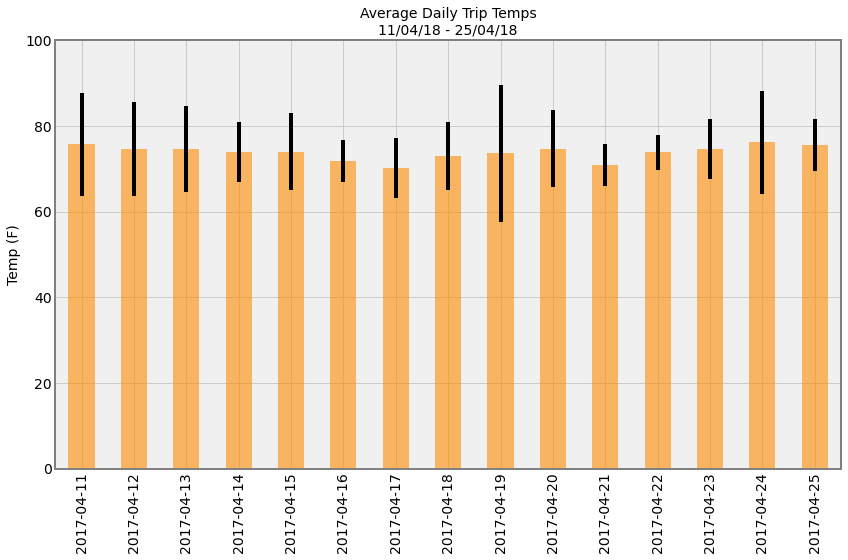

In [41]:
# Plot the results from your previous query as a bar chart. 

daily_error = []
for x in range(len(daily_data.columns)):
    daily_error.append(daily_data.iloc[2,x] - daily_data.iloc[0,x])

fig, ax = plt.subplots(facecolor='white', figsize=(12,8))

# Formatting and display
ax.spines['bottom'].set_visible(True), ax.spines['bottom'].set_color('0.5'), ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_visible(True), ax.spines['top'].set_color('0.5'), ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_visible(True), ax.spines['left'].set_color('0.5'), ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_visible(True), ax.spines['right'].set_color('0.5'), ax.spines['right'].set_linewidth(2)
fig = daily_data.loc['Avg Temp',:].plot(kind='bar', color='darkorange', yerr=daily_error, alpha=0.6)
plt.ylim(0,100)
plt.xlabel('')
plt.ylabel('Temp (F)', fontsize=14)
plt.title('Average Daily Trip Temps\n11/04/18 - 25/04/18', fontsize=14)
plt.tight_layout()
plt.savefig("Output/daily_trip_temps.png")
plt.show()

<a id='rainfall_avg'></a>
### Daily Rainfall Average

In [28]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

####################################################################################
# Planned Trip = 11/04/18 - 25/04/18, so will use the 2017 data 11/04/17 - 25/04/17
####################################################################################

# Query The holiday period by joining the measurement and station tables 
sel = [func.sum(Measurement.prcp), Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
result = session.query(*sel).filter(Station.station == Measurement.station).\
                             group_by(Station.station). filter(Measurement.date >= '2017-04-11').\
                             filter(Measurement.date <= '2017-04-25').all()

station_total_rainfall = pd.DataFrame(result, columns={0,1,2,3,4,5})
station_total_rainfall.rename(columns={0:"Total Precipitation", 1:"Station", 2:"Name", 
                                       3:"Latitude", 4:"Longitude", 5:"Elevation"}, inplace=True)

station_total_rainfall

,Total Precipitation,Station,Name,Latitude,Longitude,Elevation
0,4.99,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
1,2.61,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
2,10.97,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
3,0.00,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,10.41,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
5,0.94,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,3.52,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5


In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.round(func.avg(Measurement.tobs),2), func.max(Measurement.tobs)]
    result = session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    return list(np.ravel(result))
    

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

####################################################################################
# Planned Trip = 11/04/18 - 25/04/18, so will use the 2017 data 11/04/17 - 25/04/17
####################################################################################

# Create a list spannning the duration of the trip in the format %m-%d
# List with full date for the index
trip_dates = []
for date in range(11,26):
    trip_dates.append("2017-04-" + str(date))

# List with abbrevaited date for the daily_normals function
trip_dates_short = []
for date in range(11,26):
    trip_dates_short.append("04-" + str(date))

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for item in trip_dates_short:
    normals.append(daily_normals(item))

# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals = pd.DataFrame(normals, index=trip_dates, columns={"T-Min", "T-Max", "T-Avg"})
normals.rename(columns={"T-Avg":"T-Min", "T-Min":"T-Avg"}, inplace=True)
normals

,T-Min,T-Max,T-Avg
2017-04-11,65.0,72.49,82.0
2017-04-12,65.0,72.22,80.0
2017-04-13,64.0,71.53,79.0
2017-04-14,65.0,72.75,81.0
2017-04-15,61.0,71.79,79.0
2017-04-16,62.0,71.55,81.0
2017-04-17,65.0,71.93,77.0
2017-04-18,67.0,72.49,77.0
2017-04-19,65.0,72.42,83.0
2017-04-20,64.0,72.74,80.0


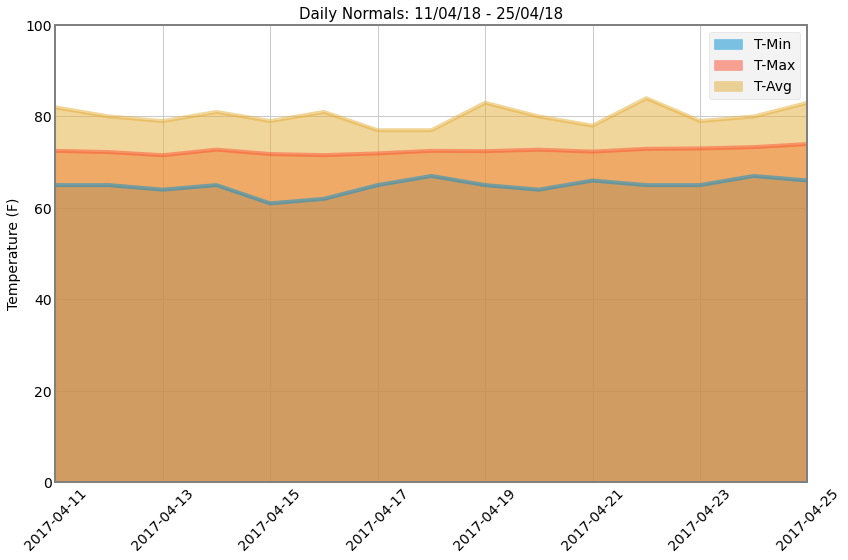

In [42]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots(facecolor='white', figsize=(12,8))
fig = normals.plot.area(stacked=False, ax=ax, rot=45)

# Formatting and display
#ax.set_xticklabels(labels=index, rotation='vertical', size=12)
ax.set_facecolor('white')
ax.spines['bottom'].set_visible(True), ax.spines['bottom'].set_color('0.5'), ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_visible(True), ax.spines['top'].set_color('0.5'), ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_visible(True), ax.spines['left'].set_color('0.5'), ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_visible(True), ax.spines['right'].set_color('0.5'), ax.spines['right'].set_linewidth(2)
plt.ylim(0,100)
plt.xlim(0,14)
plt.ylabel('Temperature (F)', fontsize=14)
plt.title('Daily Normals: 11/04/18 - 25/04/18', fontsize=15)

plt.tight_layout()
plt.savefig("Output/daily_normals.png")
plt.show()
